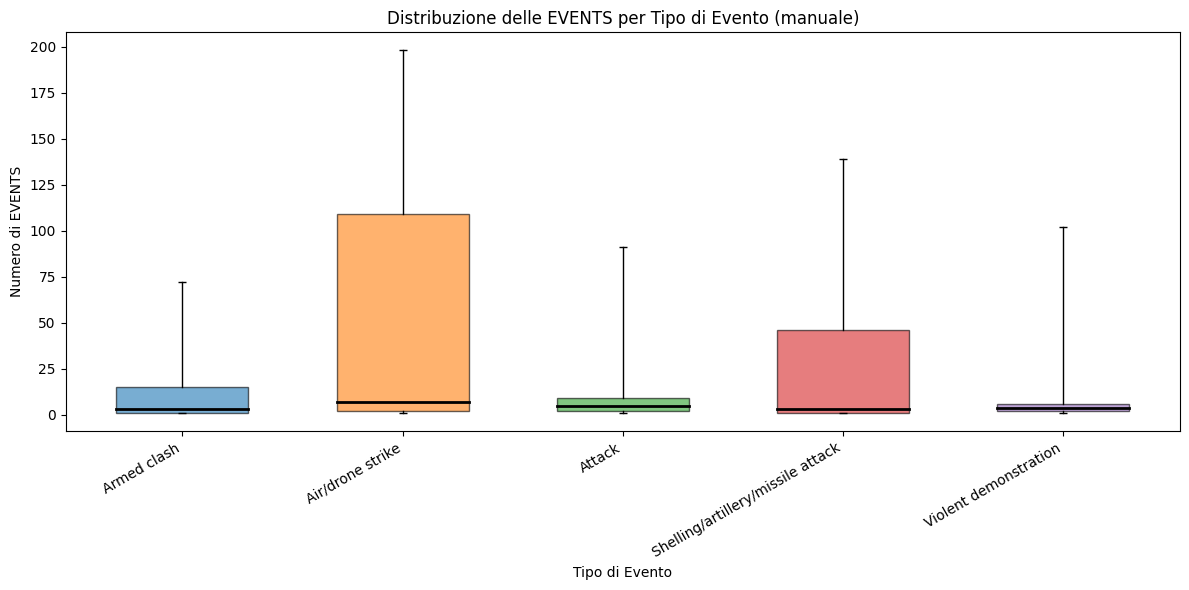

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from statistics import quantiles


# Leggi il file CSV e carica in un DataFrame
df = pd.read_csv('../raw_datasets/middle_east_aggregated_data.csv', delimiter=';')

df = df[df['COUNTRY'] == 'Palestine']

# Eventi da includere
eventi_richiesti = [
    'Armed clash', 
    'Air/drone strike', 
    'Attack', 
    'Shelling/artillery/missile attack', 
    'Violent demonstration'
]

# Verifica colonne
required_cols = {'SUB_EVENT_TYPE', 'EVENTS'}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Colonne mancanti nel DataFrame: {missing}")

# Filtro e normalizzazione numerica
df_filtrato = (
    df[df['SUB_EVENT_TYPE'].isin(eventi_richiesti)][['SUB_EVENT_TYPE','EVENTS']]
      .copy()
)
df_filtrato['EVENTS'] = pd.to_numeric(df_filtrato['EVENTS'], errors='coerce')
df_filtrato = df_filtrato.dropna(subset=['EVENTS'])

if df_filtrato.empty:
    print('Nessun dato disponibile per gli eventi richiesti.')
else:
    fig, ax = plt.subplots(figsize=(12,6))
    box_width = 0.6
    colori = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']
    drawn = 0
    for i, evt in enumerate(eventi_richiesti, start=1):
        vals = df_filtrato.loc[df_filtrato['SUB_EVENT_TYPE']==evt,'EVENTS'].astype(float).tolist()
        if len(vals) == 0:
            continue
        drawn += 1
        vals_sorted = sorted(vals)
        minimo = vals_sorted[0]
        massimo = vals_sorted[-1]
        # Quartili usando statistics.quantiles (metodo inclusivo)
        try:
            q1, med, q3 = quantiles(vals_sorted, n=4, method='inclusive')[0], quantiles(vals_sorted, n=2, method='inclusive')[0], quantiles(vals_sorted, n=4, method='inclusive')[2]
        except Exception:
            # Fallback semplice
            n = len(vals_sorted)
            q1 = vals_sorted[n//4]
            med = vals_sorted[n//2] if n % 2 == 1 else (vals_sorted[n//2-1]+vals_sorted[n//2])/2
            q3 = vals_sorted[(3*n)//4]
        # Disegno box (rettangolo da q1 a q3)
        rect = plt.Rectangle((i - box_width/2, q1), box_width, q3 - q1,
                             facecolor=colori[(i-1) % len(colori)], edgecolor='black', alpha=0.6)
        ax.add_patch(rect)
        # Median line
        ax.plot([i - box_width/2, i + box_width/2], [med, med], color='black', linewidth=2)
        # Whiskers
        ax.plot([i, i], [q3, massimo], color='black', linewidth=1)
        ax.plot([i, i], [minimo, q1], color='black', linewidth=1)
        # Min/Max markers
        ax.plot(i, minimo, marker='_', color='black')
        ax.plot(i, massimo, marker='_', color='black')
    if drawn == 0:
        print('Tutti i gruppi sono vuoti dopo il filtraggio.')
    else:
        ax.set_xticks(range(1, len(eventi_richiesti)+1))
        ax.set_xticklabels(eventi_richiesti, rotation=30, ha='right')
        ax.set_xlabel('Tipo di Evento')
        ax.set_ylabel('Numero di EVENTS')
        ax.set_title('Distribuzione delle EVENTS per Tipo di Evento (manuale)')
        plt.tight_layout()
        plt.show()

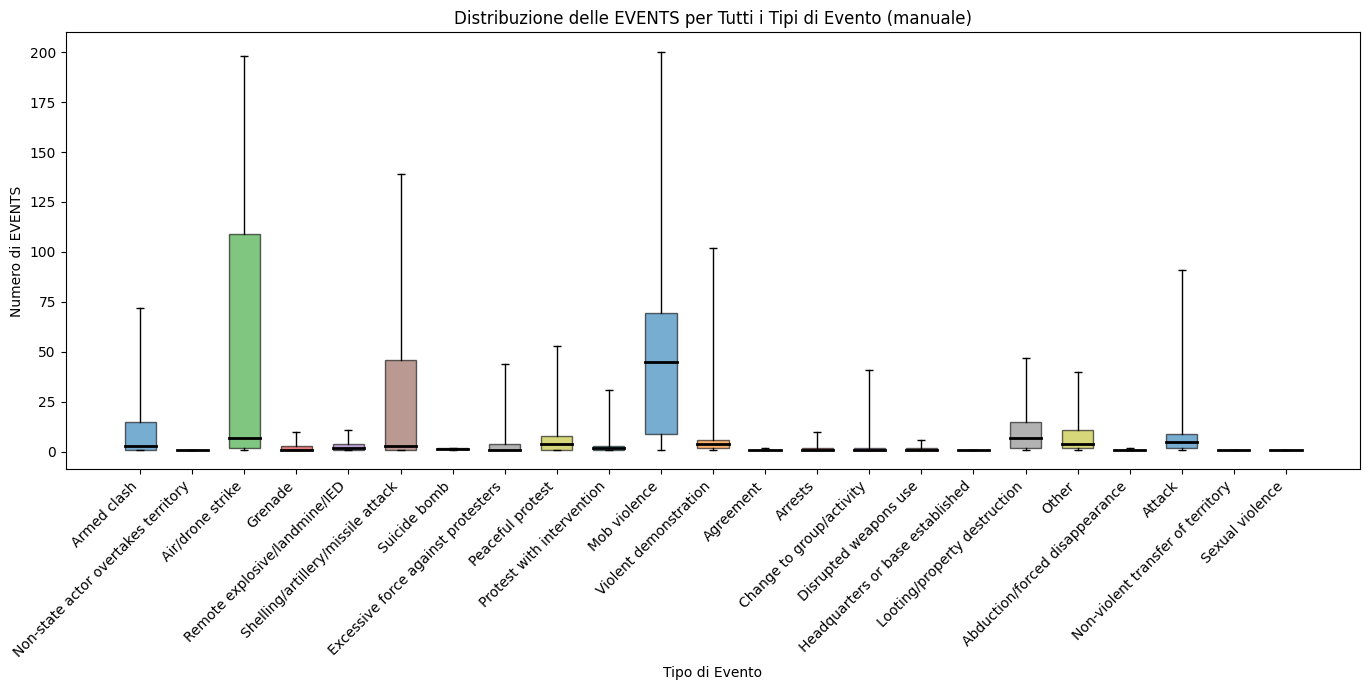

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from statistics import quantiles


# Leggi il file CSV e carica in un DataFrame
df = pd.read_csv('../raw_datasets/middle_east_aggregated_data.csv', delimiter=';')

df = df[df['COUNTRY'] == 'Palestine']


# Ottieni tutti i tipi di evento unici presenti nel DataFrame
tutti_eventi = df['SUB_EVENT_TYPE'].unique().tolist()


# Verifica colonne
required_cols = {'SUB_EVENT_TYPE', 'EVENTS'}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Colonne mancanti nel DataFrame: {missing}")

# Filtro e normalizzazione numerica (senza filtro su SUB_EVENT_TYPE)
df_tutti = df[['SUB_EVENT_TYPE','EVENTS']].copy()
df_tutti['EVENTS'] = pd.to_numeric(df_tutti['EVENTS'], errors='coerce')
df_tutti = df_tutti.dropna(subset=['EVENTS'])

if df_tutti.empty:
    print('Nessun dato disponibile.')
else:
    fig, ax = plt.subplots(figsize=(14,7))
    box_width = 0.6
    colori = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
    drawn = 0
    for i, evt in enumerate(tutti_eventi, start=1):
        vals = df_tutti.loc[df_tutti['SUB_EVENT_TYPE']==evt,'EVENTS'].astype(float).tolist()
        if len(vals) == 0:
            continue
        drawn += 1
        vals_sorted = sorted(vals)
        minimo = vals_sorted[0]
        massimo = vals_sorted[-1]
        # Quartili usando statistics.quantiles (metodo inclusivo)
        try:
            q1, med, q3 = quantiles(vals_sorted, n=4, method='inclusive')[0], quantiles(vals_sorted, n=2, method='inclusive')[0], quantiles(vals_sorted, n=4, method='inclusive')[2]
        except Exception:
            # Fallback semplice
            n = len(vals_sorted)
            q1 = vals_sorted[n//4]
            med = vals_sorted[n//2] if n % 2 == 1 else (vals_sorted[n//2-1]+vals_sorted[n//2])/2
            q3 = vals_sorted[(3*n)//4]
        # Disegno box (rettangolo da q1 a q3)
        rect = plt.Rectangle((i - box_width/2, q1), box_width, q3 - q1,
                             facecolor=colori[(i-1) % len(colori)], edgecolor='black', alpha=0.6)
        ax.add_patch(rect)
        # Median line
        ax.plot([i - box_width/2, i + box_width/2], [med, med], color='black', linewidth=2)
        # Whiskers
        ax.plot([i, i], [q3, massimo], color='black', linewidth=1)
        ax.plot([i, i], [minimo, q1], color='black', linewidth=1)
        # Min/Max markers
        ax.plot(i, minimo, marker='_', color='black')
        ax.plot(i, massimo, marker='_', color='black')
    if drawn == 0:
        print('Tutti i gruppi sono vuoti dopo il filtraggio.')
    else:
        ax.set_xticks(range(1, len(tutti_eventi)+1))
        ax.set_xticklabels(tutti_eventi, rotation=45, ha='right')
        ax.set_xlabel('Tipo di Evento')
        ax.set_ylabel('Numero di EVENTS')
        ax.set_title('Distribuzione delle EVENTS per Tutti i Tipi di Evento (manuale)')
        plt.tight_layout()
        plt.show()